In [1]:
#import Library 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.regularizers import Regularizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()

data = open('wonderland.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


In [3]:
len(tokenizer.word_index)

2639

In [4]:
tokenizer.word_index

{'the': 1,
 "'": 2,
 'and': 3,
 'to': 4,
 'a': 5,
 'she': 6,
 'it': 7,
 'of': 8,
 'said': 9,
 'i': 10,
 'alice': 11,
 'in': 12,
 'you': 13,
 'was': 14,
 'that': 15,
 'as': 16,
 'her': 17,
 'at': 18,
 'on': 19,
 'all': 20,
 'with': 21,
 'had': 22,
 'but': 23,
 'for': 24,
 'so': 25,
 'be': 26,
 'very': 27,
 'not': 28,
 'what': 29,
 'this': 30,
 'they': 31,
 'little': 32,
 'he': 33,
 'out': 34,
 'is': 35,
 'one': 36,
 'down': 37,
 'up': 38,
 'if': 39,
 'his': 40,
 'then': 41,
 'about': 42,
 'no': 43,
 'them': 44,
 'know': 45,
 'like': 46,
 'were': 47,
 'would': 48,
 'went': 49,
 'again': 50,
 'herself': 51,
 'do': 52,
 'have': 53,
 'when': 54,
 'or': 55,
 'could': 56,
 'there': 57,
 'thought': 58,
 'off': 59,
 'time': 60,
 'how': 61,
 'queen': 62,
 'into': 63,
 'see': 64,
 'me': 65,
 'well': 66,
 'did': 67,
 'your': 68,
 'who': 69,
 "don't": 70,
 'king': 71,
 'now': 72,
 "i'm": 73,
 'by': 74,
 'began': 75,
 'my': 76,
 'its': 77,
 'an': 78,
 "it's": 79,
 'turtle': 80,
 'way': 81,
 'mock': 

In [5]:
#Created objects
#input_sequences
#tokenizer.word_index

In [6]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


In [7]:
input_sequences

[[11, 14],
 [11, 14, 255],
 [11, 14, 255, 4],
 [11, 14, 255, 4, 103],
 [11, 14, 255, 4, 103, 27],
 [11, 14, 255, 4, 103, 27, 477],
 [11, 14, 255, 4, 103, 27, 477, 8],
 [11, 14, 255, 4, 103, 27, 477, 8, 353],
 [11, 14, 255, 4, 103, 27, 477, 8, 353, 74],
 [11, 14, 255, 4, 103, 27, 477, 8, 353, 74, 17],
 [11, 14, 255, 4, 103, 27, 477, 8, 353, 74, 17, 423],
 [19, 1],
 [19, 1, 846],
 [19, 1, 846, 3],
 [19, 1, 846, 3, 8],
 [19, 1, 846, 3, 8, 354],
 [19, 1, 846, 3, 8, 354, 131],
 [19, 1, 846, 3, 8, 354, 131, 4],
 [19, 1, 846, 3, 8, 354, 131, 4, 52],
 [19, 1, 846, 3, 8, 354, 131, 4, 52, 132],
 [19, 1, 846, 3, 8, 354, 131, 4, 52, 132, 55],
 [19, 1, 846, 3, 8, 354, 131, 4, 52, 132, 55, 605],
 [19, 1, 846, 3, 8, 354, 131, 4, 52, 132, 55, 605, 6],
 [19, 1, 846, 3, 8, 354, 131, 4, 52, 132, 55, 605, 6, 22],
 [847, 63],
 [847, 63, 1],
 [847, 63, 1, 325],
 [847, 63, 1, 325, 17],
 [847, 63, 1, 325, 17, 423],
 [847, 63, 1, 325, 17, 423, 14],
 [847, 63, 1, 325, 17, 423, 14, 848],
 [847, 63, 1, 325, 17, 4

In [17]:
corpus[8]

'  alice was beginning to get very tired of sitting by her sister'

In [18]:
tokenizer.word_index['from']

128

In [19]:
tokenizer.word_index['rose']

829

In [20]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [21]:
input_sequences.shape

(25056, 16)

In [22]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [23]:
predictors.shape

(25056, 15)

In [24]:
len(label)

25056

In [25]:
#train features
len(predictors)

25056

In [26]:
label.shape

(25056, 2640)

In [27]:
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))  #(# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences=True)))  #(# An LSTM Layer)
model.add(Dropout(0.2))  #(# A dropout layer)
model.add(LSTM(100))  #(# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu'))  #(# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))  #(# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  #(# Pick a loss function and an optimizer)
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 10)            26400     
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 300)           193200    
_________________________________________________________________
dropout (Dropout)            (None, 15, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1320)              133320    
_________________________________________________________________
dense_1 (Dense)              (None, 2640)              3487440   
Total params: 4,000,760
Trainable params: 4,000,760
Non-trainable params: 0
______________________________________________

In [28]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
783/783 [==============================] - 17s 22ms/step - loss: 6.0322 - accuracy: 0.0605
Epoch 2/100
783/783 [==============================] - 17s 22ms/step - loss: 5.5630 - accuracy: 0.0743
Epoch 3/100
783/783 [==============================] - 17s 22ms/step - loss: 5.2985 - accuracy: 0.0883
Epoch 4/100
783/783 [==============================] - 17s 22ms/step - loss: 5.1016 - accuracy: 0.1052
Epoch 5/100
783/783 [==============================] - 17s 22ms/step - loss: 4.9259 - accuracy: 0.1228
Epoch 6/100
783/783 [==============================] - 17s 22ms/step - loss: 4.7483 - accuracy: 0.1406
Epoch 7/100
783/783 [==============================] - 17s 22ms/step - loss: 4.5909 - accuracy: 0.1528
Epoch 8/100
783/783 [==============================] - 17s 22ms/step - loss: 4.4451 - accuracy: 0.1650
Epoch 9/100
783/783 [==============================] - 17s 22ms/step - loss: 4.3036 - accuracy: 0.1752
Epoch 10/100
783/783 [==============================] - 17s 22ms/step - l

783/783 [==============================] - 18s 23ms/step - loss: 0.4474 - accuracy: 0.8627
Epoch 80/100
783/783 [==============================] - 18s 23ms/step - loss: 0.4506 - accuracy: 0.8626
Epoch 81/100
783/783 [==============================] - 18s 23ms/step - loss: 0.4341 - accuracy: 0.8669
Epoch 82/100
783/783 [==============================] - 17s 22ms/step - loss: 0.4459 - accuracy: 0.8629
Epoch 83/100
783/783 [==============================] - 17s 22ms/step - loss: 0.4423 - accuracy: 0.8657
Epoch 84/100
783/783 [==============================] - 17s 22ms/step - loss: 0.4354 - accuracy: 0.8672
Epoch 85/100
783/783 [==============================] - 17s 22ms/step - loss: 0.4335 - accuracy: 0.8662
Epoch 86/100
783/783 [==============================] - 17s 22ms/step - loss: 0.4344 - accuracy: 0.8660
Epoch 87/100
783/783 [==============================] - 17s 22ms/step - loss: 0.4370 - accuracy: 0.8651
Epoch 88/100
783/783 [==============================] - 17s 22ms/step - loss:

In [29]:
model.save('Wonderland.h5')

In [30]:
from tensorflow import keras
model = keras.models.load_model('wonderland.h5')

In [31]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [32]:
def plot_graph(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

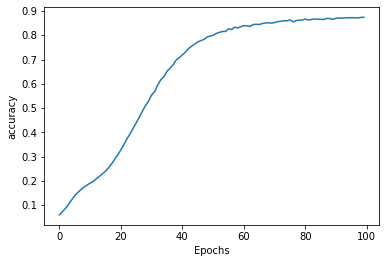

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_graph(history,'accuracy')

In [38]:
seed_text = "beauty"
next_words = 5
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

beauty but it goes on they


In [ ]:
confusing
immediately
your soul
my eyes
beauty
clear sky
rain
you pain